# 문서 유사도

### 문서 간의 유사도 - 코사인 유사도(Cosine Similarity)
* 두 벡터 사의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

#### 두 벡터 사잇각

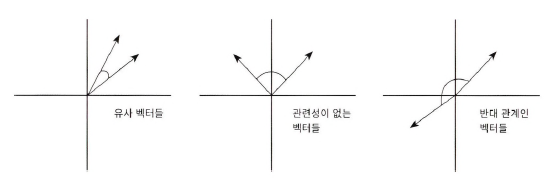

* 두 벡터 A와 B의 내적 값은 두 벡터의 크기를 곱한 값의 코사인 각도 값을 곱한 것.

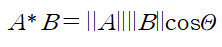

* 유사도 cosθ = 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것(내적 결과를 총 벡터 크기로 정규화(L2 Norm)한 것)

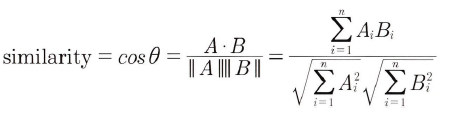

* 문서를 피처 벡터화 시 차원이 매우 많은 희소 행렬이 되기 쉬움 -> 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(유클리드 거리 기반 지표)는 정확도가 떨어지기 쉬움
* 문서가 매우 긴 경우 단어의 빈도수가 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교를 할 수 없음

In [1]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

In [2]:
# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡텅화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


변환된 행렬은 희소 행렬이므로 cos_similarity() 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각 배열로 변환한다.

In [3]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환.
feature_vect_dense = feature_vect_simple.todense()

# feture_vect_dense[0]은 doc_list 첫 번째 문서의 피처 텍처화
# feture_vect_dense[1]은 doc_list 두 번째 문서의 피처 텍처화
# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [4]:
# 첫 번째 문장과 세 번재 문장, 세 번째과 두 번째 문장
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


* 사이킷런의 코사인 유사도 - sklean.metrics.pairwise.cosine_similarity API


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine_similarity() : 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬, 두 번째 파라미터는 비교되는 문서의 피처 행렬
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple) # 첫번째 문서와 자기 자신, 두번째 문서, 세번째 문서의 유사도
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능. 행렬 또는 배열도 모두 가능. => 변환 작업이 필요 없음.

In [6]:
# cosine_similarity()는 쌍으로(pair) 코사인 유사도 값을 제공할 수 있다.
# 모든 개별 문서에 쌍으로 코사인 유사도 값을 계산

similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape :', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape : (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [7]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('all')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [8]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/파이썬_머신러닝_완벽가이드/08_Text_Analytics/Text'
all_files = glob.glob(os.path.join(path, "*.data"))
all_files.sort()
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85 )
#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [9]:
document_df

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
1,bathroom_bestwestern_hotel_sfo,...,2
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,0
4,battery-life_netbook_1005ha,...,0
5,buttons_amazon_kindle,...,0
6,comfort_honda_accord_2008,...,1
7,comfort_toyota_camry_2007,...,1
8,directions_garmin_nuvi_255W_gps,...,0
9,display_garmin_nuvi_255W_gps,...,0


문서의 군집화는 전자제품, 호텔, 자동차를 주제로 군집화되었다. 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 구해본다.

1. 호텔을 주제로 군집화된 데이터 추출한 후 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출. -> 인덱스 추출
2. 추출된 인덱스를 이용해 TfidfVectorizer 객체 변수인 feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터이다. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 군집화된 문서들의 DataFrame Index :', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname,'와 타 문서 유사도')

'''
document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index : Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo 와 타 문서 유사도
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.51442299 0.38038865 0.32619948 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


#### 시각화

* cosine_similarity()는 쌍 형태의 ndarray를 반환하므로 이를 판다스 인덱스로 이용하기 위해 reshape(-1)로 차원 변경

Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

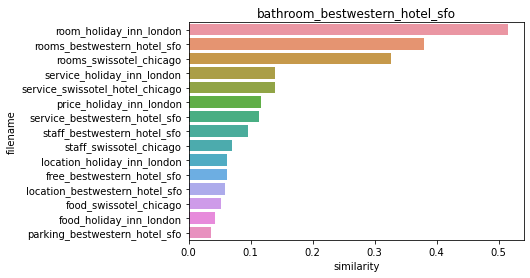

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)